In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\AI\Intership Project\train_exclude_last_10d.csv")
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_21688\2880685073.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\AI\Intership Project\train_exclude_last_10d.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-07-21,3558,469,1,0,0,0
1,2,2,2015-07-21,3836,532,1,0,0,1
2,3,2,2015-07-21,5600,661,1,0,0,1
3,4,2,2015-07-21,9176,1149,1,0,0,1
4,5,2,2015-07-21,3497,445,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1006054,1111,2,2013-01-01,0,0,0,0,a,1
1006055,1112,2,2013-01-01,0,0,0,0,a,1
1006056,1113,2,2013-01-01,0,0,0,0,a,1
1006057,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006059 entries, 0 to 1006058
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1006059 non-null  int64 
 1   DayOfWeek      1006059 non-null  int64 
 2   Date           1006059 non-null  object
 3   Sales          1006059 non-null  int64 
 4   Customers      1006059 non-null  int64 
 5   Open           1006059 non-null  int64 
 6   Promo          1006059 non-null  int64 
 7   StateHoliday   1006059 non-null  object
 8   SchoolHoliday  1006059 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.1+ MB


In [4]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.006059e+06,1.006059e+06,1.006059e+06,1.006059e+06,1.006059e+06,1.006059e+06,1.006059e+06
mean,5.584345e+02,3.998322e+00,5.765311e+03,6.327900e+02,8.293182e-01,3.802014e-01,1.740584e-01
std,3.219090e+02,2.000134e+00,3.851619e+03,4.649235e+02,3.762309e-01,4.854364e-01,3.791599e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.717000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.737000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.848000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

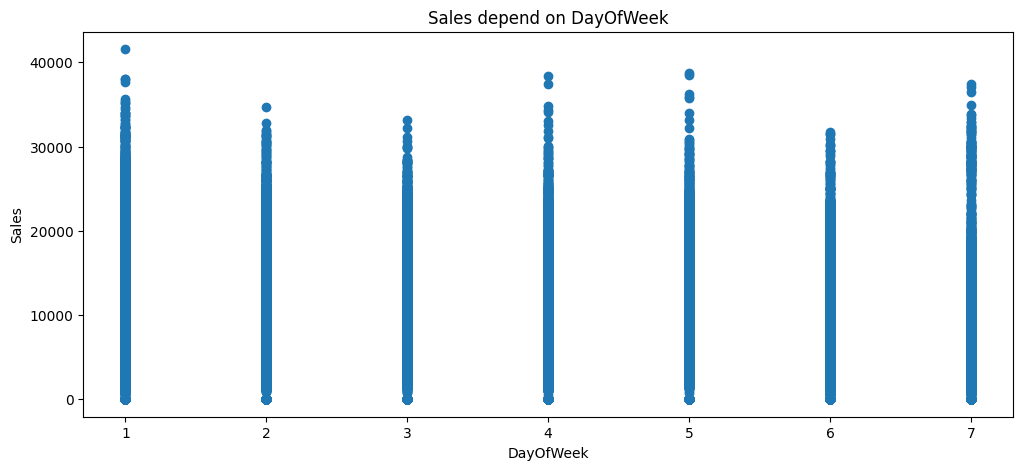

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(df['DayOfWeek'], df['Sales'])
plt.xlabel("DayOfWeek")
plt.ylabel("Sales")
plt.title("Sales depend on DayOfWeek")
plt.show()

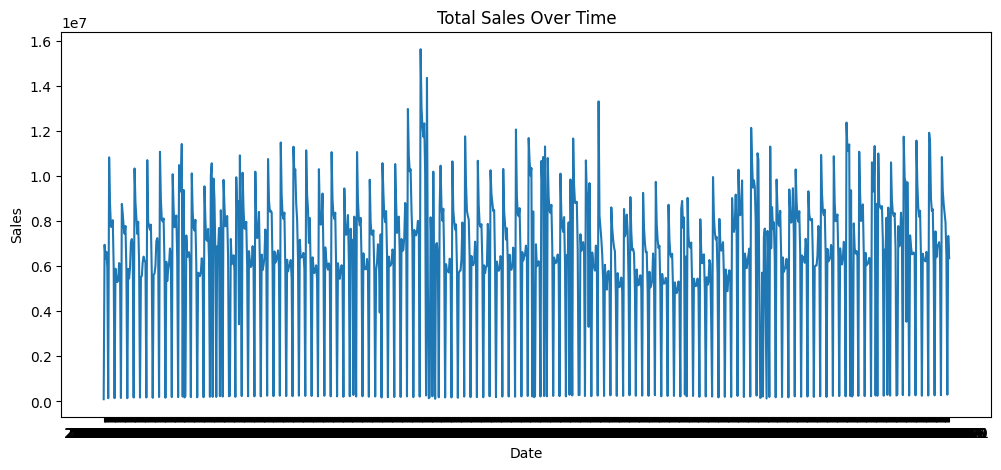

In [8]:
df_dailysales = df.groupby("Date")['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df_dailysales["Date"], df_dailysales["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Total Sales Over Time")
plt.show()

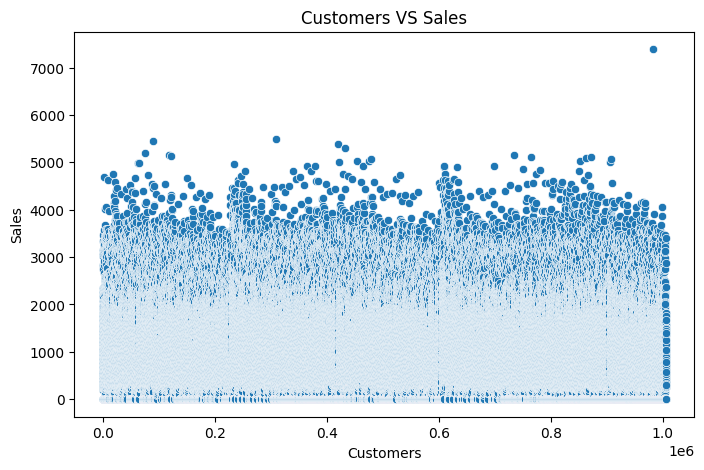

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(df["Customers"])
plt.title("Customers VS Sales")
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

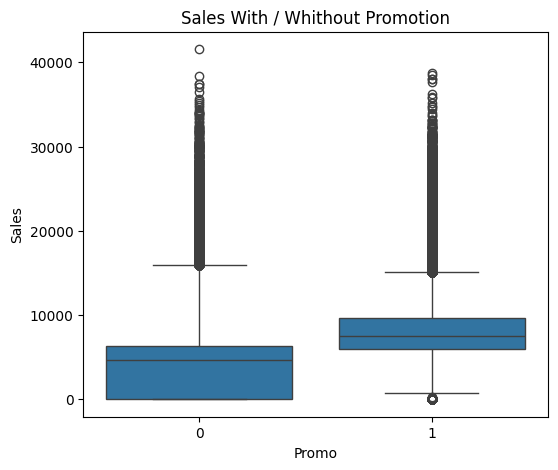

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(x = "Promo", y= "Sales", data = df)
plt.title("Sales With / Whithout Promotion")
plt.show()

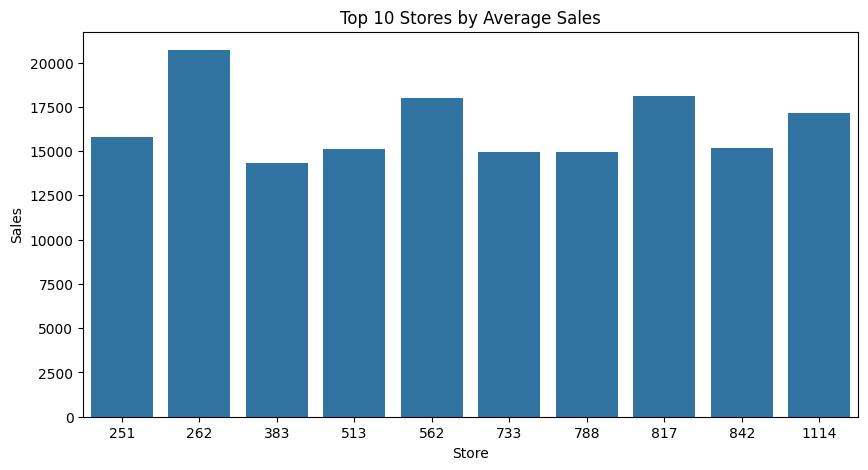

In [11]:
store_sales = df.groupby('Store')['Sales'].mean().reset_index()
top10 = store_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='Sales', data=top10)
plt.title("Top 10 Stores by Average Sales")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21688\4204130243.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


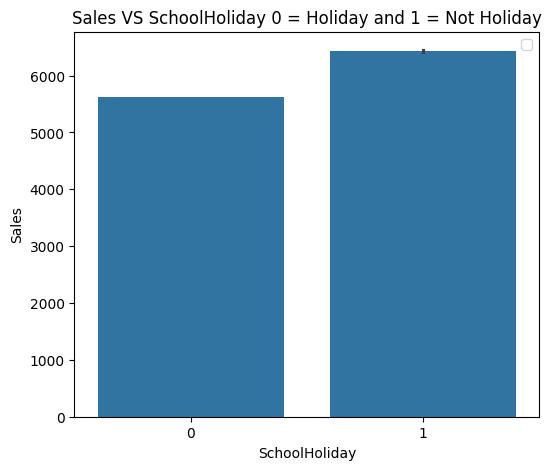

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(x = "SchoolHoliday", y = "Sales", data = df)
plt.xlabel("SchoolHoliday")
plt.ylabel("Sales")
plt.title("Sales VS SchoolHoliday 0 = Holiday and 1 = Not Holiday")
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21688\3939572719.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


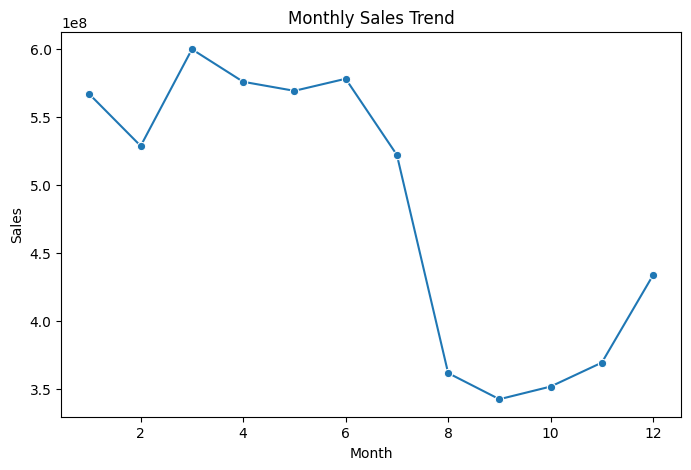

In [19]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.show()

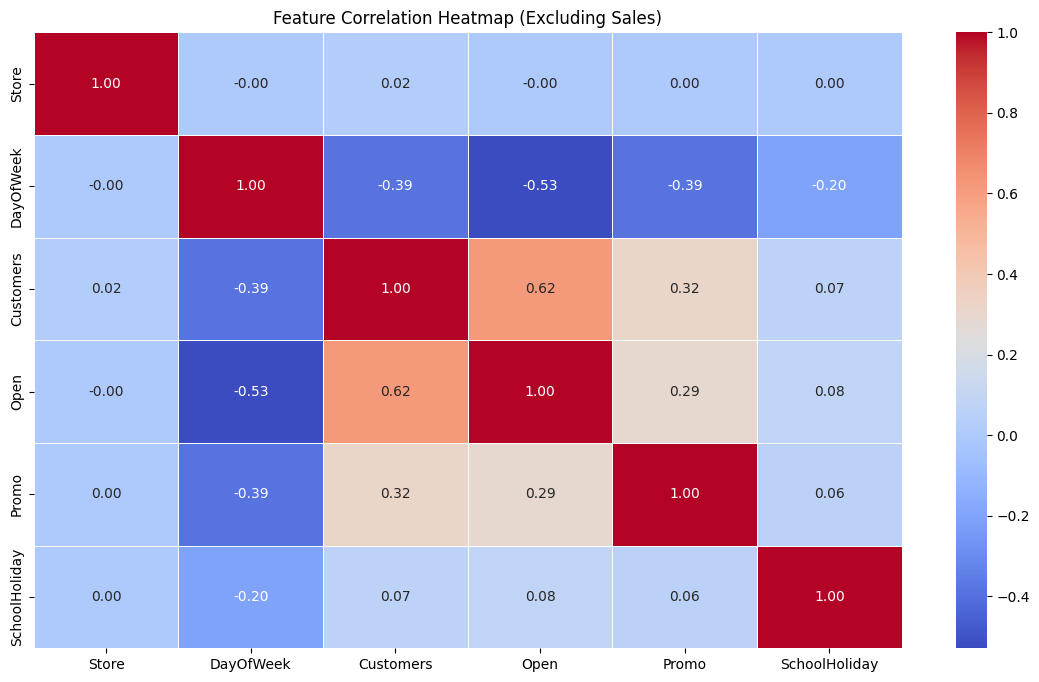

In [29]:
data_without_sales = df.drop(columns = ['Sales'], axis = 1)
numeric_df = data_without_sales.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Excluding Sales)")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
dt = pd.read_csv(r"D:\AI\Intership Project\train_exclude_last_10d.csv")
dt['Date'] = pd.to_datetime(dt['Date'], dayfirst=True)
dt

C:\Users\Admin\AppData\Local\Temp\ipykernel_21688\1389717120.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(r"D:\AI\Intership Project\train_exclude_last_10d.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_21688\1389717120.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dt['Date'] = pd.to_datetime(dt['Date'], dayfirst=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-07-21,3558,469,1,0,0,0
1,2,2,2015-07-21,3836,532,1,0,0,1
2,3,2,2015-07-21,5600,661,1,0,0,1
3,4,2,2015-07-21,9176,1149,1,0,0,1
4,5,2,2015-07-21,3497,445,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1006054,1111,2,2013-01-01,0,0,0,0,a,1
1006055,1112,2,2013-01-01,0,0,0,0,a,1
1006056,1113,2,2013-01-01,0,0,0,0,a,1
1006057,1114,2,2013-01-01,0,0,0,0,a,1


In [40]:
dt['Year'] = dt['Date'].dt.year
dt['Month'] = dt['Date'].dt.month
dt['Day'] = dt['Date'].dt.day
dt['WeekOfYear'] = dt['Date'].dt.isocalendar().week.astype(int)

In [55]:
dt['StateHoliday'] = dt['StateHoliday'].astype(str)
dt['StateHoliday'] = dt['StateHoliday'].map({
    '0': 0,
    'a': 1,
    'b': 2,
    'c': 3
})


In [56]:
dt['StateHoliday'].fillna(0, inplace=True)


In [57]:
dt.drop(columns=['Date'], inplace=True)

In [58]:

x = dt.drop(columns =['Sales'])
x.head(5)

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,2,469,1,0,0.0,0,2015,7,21,30
1,2,2,532,1,0,0.0,1,2015,7,21,30
2,3,2,661,1,0,0.0,1,2015,7,21,30
3,4,2,1149,1,0,0.0,1,2015,7,21,30
4,5,2,445,1,0,0.0,1,2015,7,21,30


In [59]:
y = dt[['Sales']]
y.head(5)

,Sales
0,3558
1,3836
2,5600
3,9176
4,3497


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [61]:
model = XGBRegressor()

In [62]:
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [63]:
y_pred = model.predict(x_test)

In [64]:
y_pred

array([ 8888.603 ,  5350.929 ,  1984.5382, ...,  7889.53  ,  5447.2764,
       11394.516 ], shape=(201212,), dtype=float32)

In [66]:
mse = mean_squared_error(y_test, y_pred)
mse

963010.4375

In [67]:
mea = mean_absolute_error(y_test, y_pred)
mea

672.5170288085938

In [68]:
r2 = r2_score(y_test, y_pred)
r2

0.9348816871643066